In [21]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
df = pd.read_csv('D:/FUCK!!/Pattern/Project/notebooks/image_dataset.csv')

In [23]:
output_dir = 'preprocessed_images'
os.makedirs(output_dir, exist_ok=True)

In [24]:
# Image preprocessing parameters
IMG_SIZE = (224, 224)  # Standard size for many CNN models
BATCH_SIZE = 32
AUGMENTATION_FACTOR = 10

In [25]:
def preprocess_image(image_path, target_size=IMG_SIZE):
    """Preprocess a single image"""
    try:
        # Open and resize image
        img = Image.open(image_path)
        img = img.resize(target_size)
        
        # Convert to grayscale
        img = img.convert('L')
            
        # Convert to numpy array and normalize
        img_array = np.array(img) / 255.0
        
        # Add channel dimension for grayscale
        img_array = np.expand_dims(img_array, axis=-1)
        
        return img_array
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

In [26]:
# Split the data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Create directories for train and validation
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create subdirectories for each class
for label in df['label'].unique():
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)

In [27]:
# Set up data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# For validation, we only need rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# Process each class separately to ensure all images are augmented
for class_name in df['label'].unique():
    print(f"\nProcessing class: {class_name}")
    
    # Filter dataframes for current class
    class_train_df = train_df[train_df['label'] == class_name]
    class_val_df = val_df[val_df['label'] == class_name]
    
    # Create class-specific directories
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)
    
    # Process training images with augmentation
    print(f"Processing {len(class_train_df)} training images for {class_name}")
    for idx, row in class_train_df.iterrows():
        img_path = row['image_path']
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        
        # Create data generator for this specific image
        single_img_df = pd.DataFrame([row])
        train_generator = train_datagen.flow_from_dataframe(
            dataframe=single_img_df,
            x_col='image_path',
            y_col='label',
            target_size=IMG_SIZE,
            batch_size=1,
            class_mode='categorical',
            color_mode='grayscale',
            save_to_dir=class_train_dir,
            save_format='jpg',
            save_prefix=f'aug_{base_name}_'
        )
        
        # Generate AUGMENTATION_FACTOR augmented versions
        for aug_idx in range(AUGMENTATION_FACTOR):
            next(train_generator)
    
    # Process validation images (no augmentation)
    print(f"Processing {len(class_val_df)} validation images for {class_name}")
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=class_val_df,
        x_col='image_path',
        y_col='label',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        color_mode='grayscale',
        save_to_dir=class_val_dir,
        save_format='jpg'
    )
    
    # Process all validation images
    for _ in range(len(class_val_df) // BATCH_SIZE + 1):
        next(val_generator)



Processing class: Achaemenid architecture
Processing 259 training images for Achaemenid architecture
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image file


Visualizing augmented images...


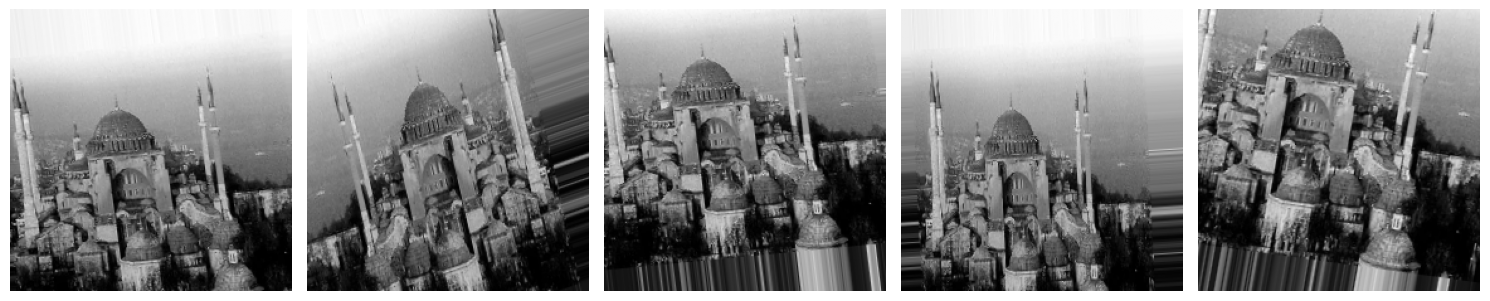

In [30]:
# Visualize some augmented images
def visualize_augmented_images(generator, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        batch = next(generator)
        image = batch[0][0]
        plt.imshow(image.squeeze(), cmap='gray')  # Use gray colormap for grayscale images
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize augmented images
print("\nVisualizing augmented images...")
visualize_augmented_images(train_generator)